# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. This project aims to help, improve and practice data visualization and pandas skills. 

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly to read data from Yahoo finance

First, we need to install pandas-datareader [We need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows us to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)





In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.


In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

**Concatenate the bank dataframes into a single data frame called bank_stocks

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [5]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.596096   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.228691   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.272778   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.221321   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.243366   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.867344  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.892612  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  36.993786  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.031731  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.423725  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.723480  
2006-01-04  31.530001  10870000.0  20.483118  
2006-01-05  31.495001  10158000.0  20.460379  
2006-01-06  31.680000   8403800.0  20.580564  
2006-01-09  31.674999   5619600.0  20.577309  

[5 rows x 36 columns]

** Set the column name levels

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.596096  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.228691  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.272778  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.221321  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.243366  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.867344  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.892612  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.993786  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.031731  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.423725  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.723480  
2006-01-04   31.799999  31.530001  10870000.0  20.483118  
2006-01-05   31.500000  31.495001  10158000.0  20.460379  
2006-01-06   31.580000  31.680000   8403800.0  20.580564  
2006-01-09   31.674999  31.674999   5619600.0  20.577309  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit!

** What is the max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()
#bank_stocks['BAC']['Close'] == bank_stocks['BAC']['Close'].max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value.

In [10]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe.

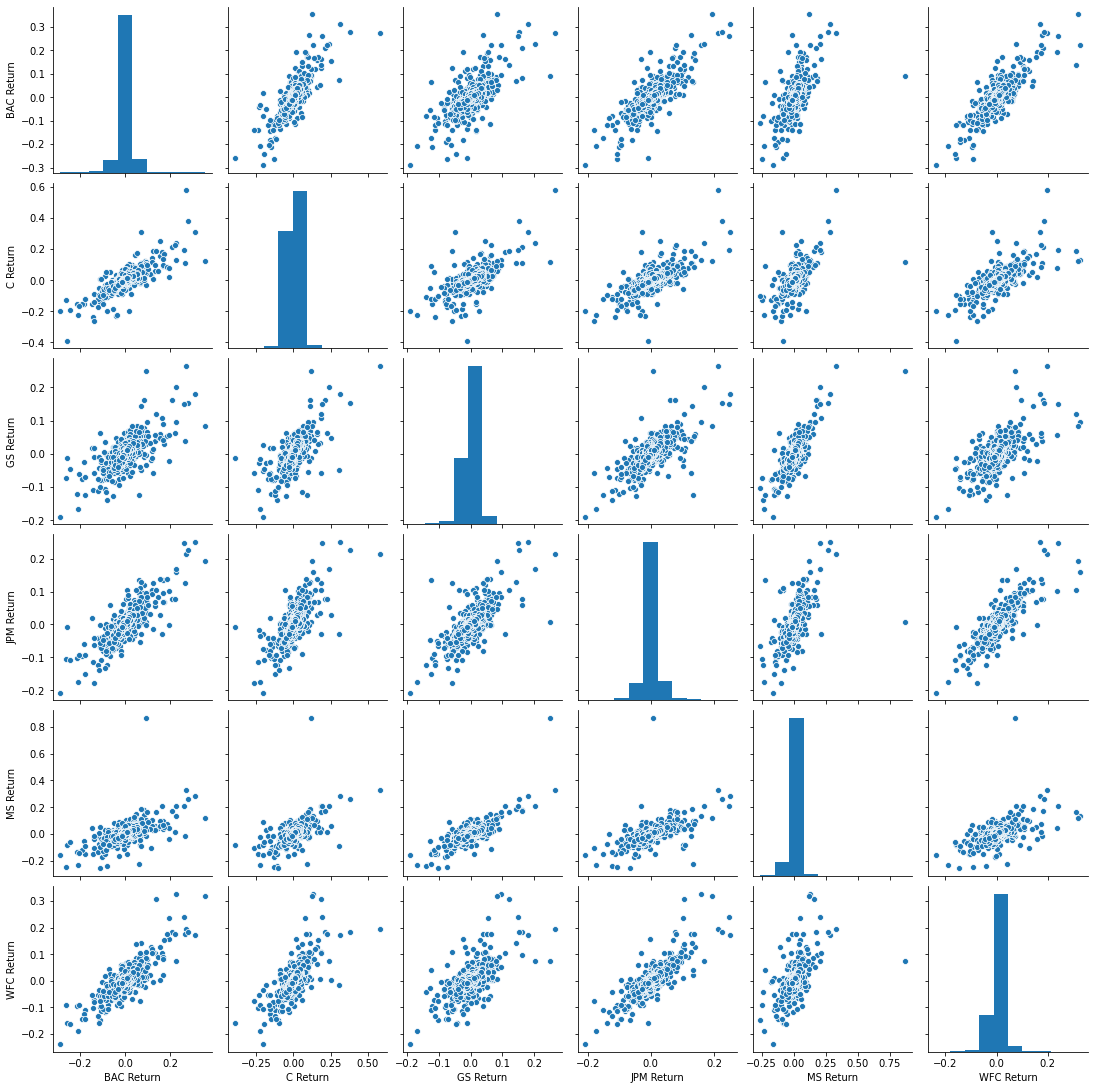

In [11]:
import seaborn as sns
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. 

In [12]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

We can see that 4 of the banks had their worse returns on the same day. Coincidently, this was Inauguration day.

In [13]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

We can Citigroup's largest drop and biggest gain were very close to one another. This is due to the announcement of a stock split. [Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

Which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [14]:
returns.std() # Citigroup riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [15]:
returns.loc['2015-01-01':'2015-12-31'].std()


BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

All of the values are very close to each other, This makes a lot of sense because all these banks relitavely have the same risk profile.

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

Text(0, 0.5, 'Count')

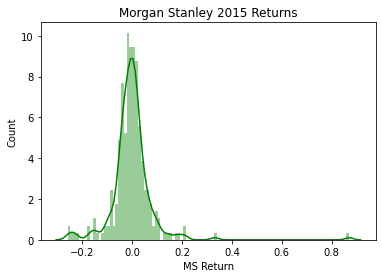

In [16]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['MS Return'],color='green',bins=100)
plt.title('Morgan Stanley 2015 Returns')
plt.ylabel('Count')

** Create a distplot using seaborn of the 2008 returns for Morgan Stanley **

Text(0, 0.5, 'Count')

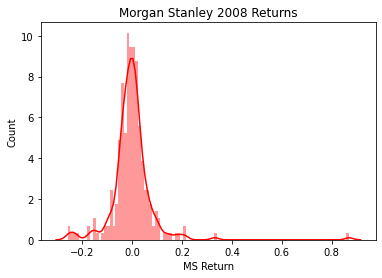

In [17]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['MS Return'],color='red',bins=100)
plt.title('Morgan Stanley 2008 Returns')
plt.ylabel("Count")

If we look at the x axis, we can see that the deviation of returns in 2008 are a lot greater than in 2015. This is due to the financial crisis that occured, increasing the risk and standard devation of returns. 

# More Visualizations

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

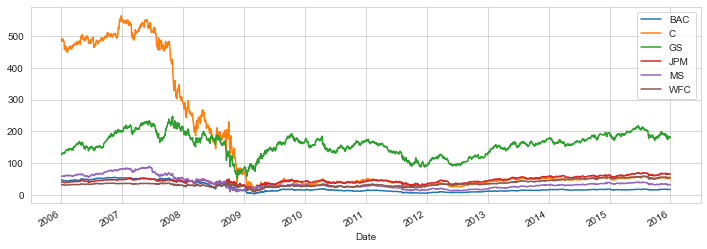

In [19]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()
#bank_stocks.xs(key='Close', axis=1,level='Stock Info').plot()

We can see that CitiGroup's price collapsed compared to other banks. This is due to it's insolvency in 2008. More information can be found here: https://en.wikipedia.org/wiki/Citigroup#Collapse_and_US_government_intervention_(2008)

In [20]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

Text(0.5, 1.0, '30 Day Moving Average Bank of America')

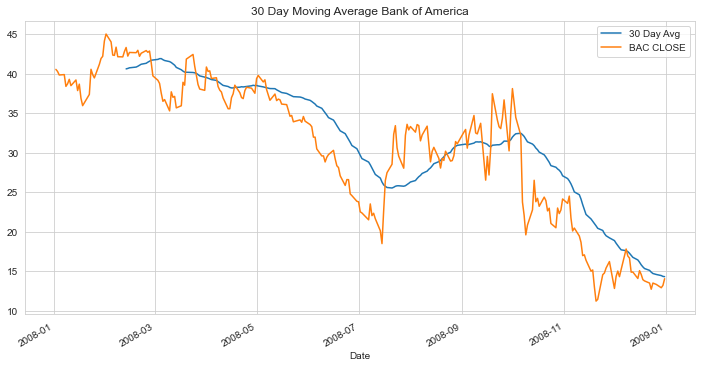

In [21]:
plt.figure(figsize=(12,6))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()
plt.title('30 Day Moving Average Bank of America')

** Create a heatmap of the correlation between the stocks Close Price.**

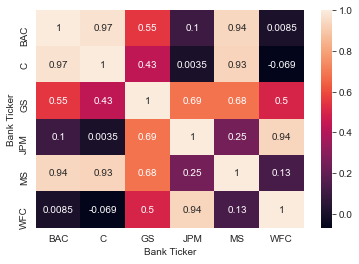

In [22]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Part 2 - Technical Analysis

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [23]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle', title="Bank of America Candle plot")

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [24]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015

In [25]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')